----------------------
| Total Sales: 1.57M |
----------------------
----------------------
| Total Profit: 175K |
----------------------


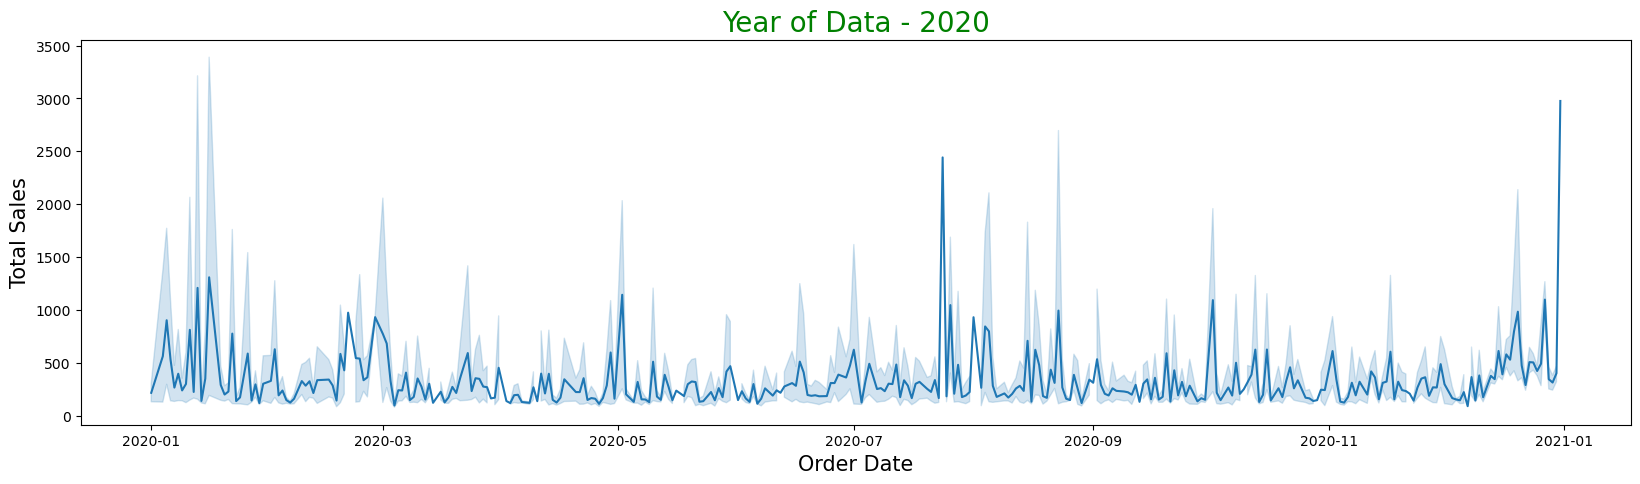

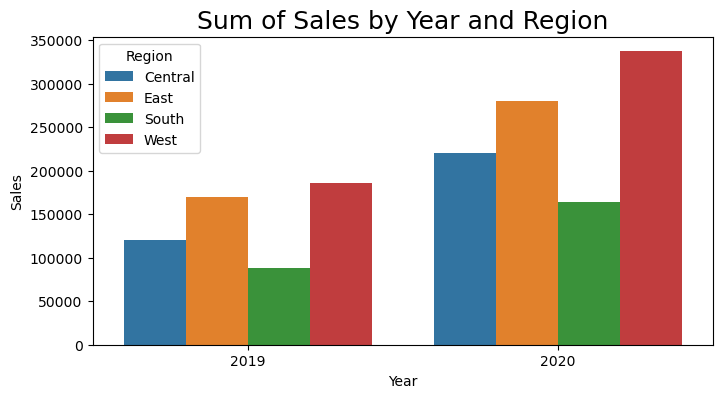

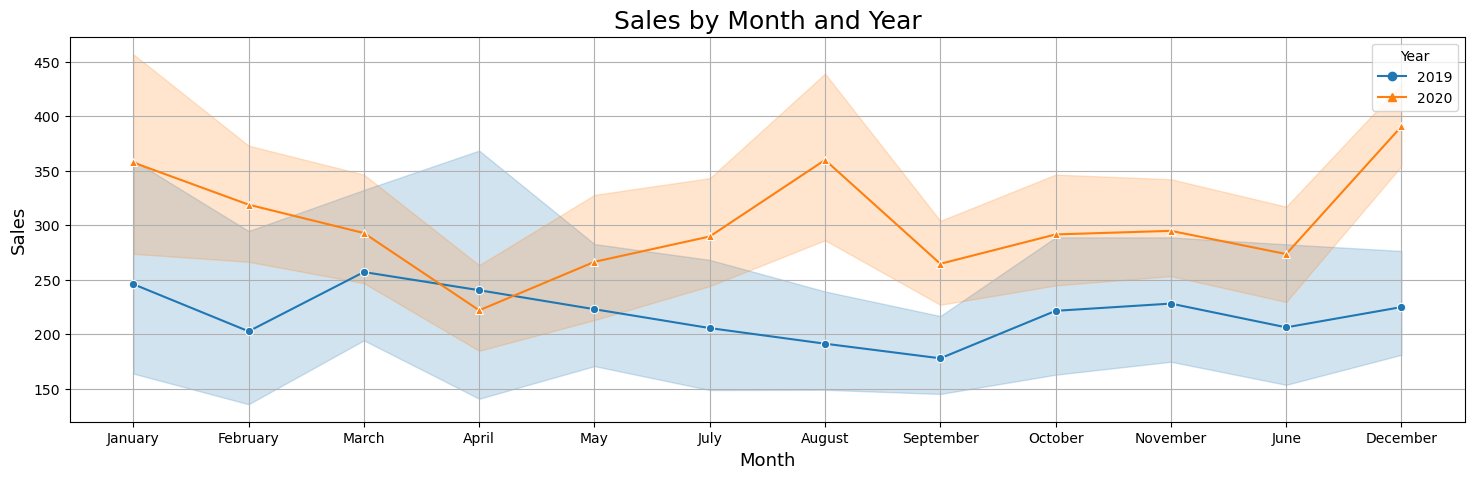

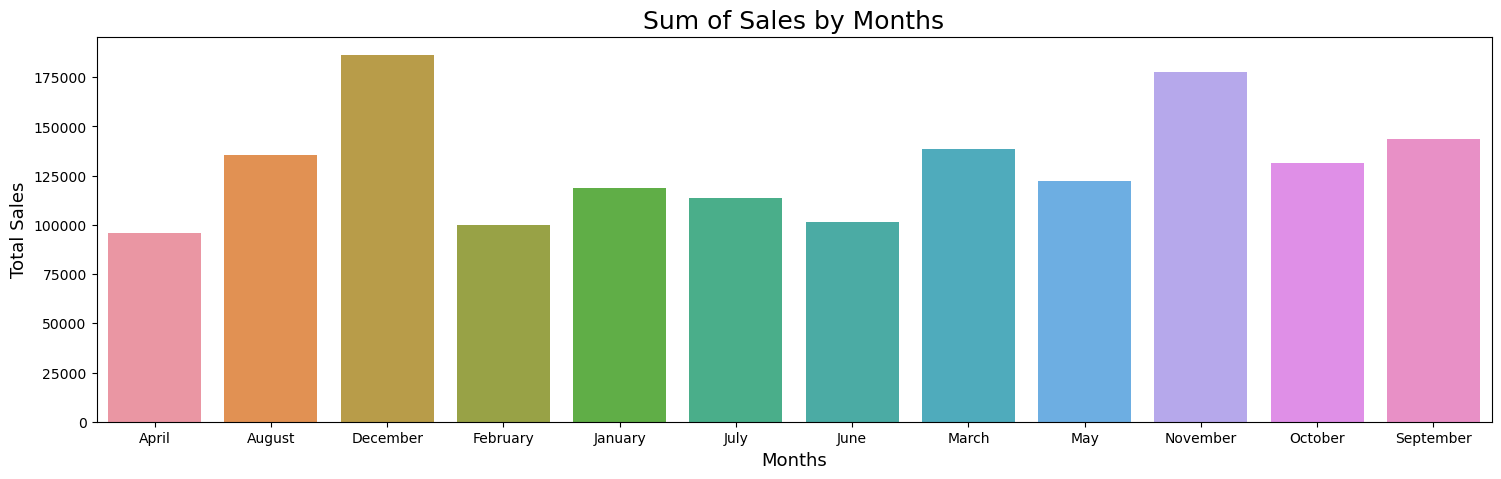

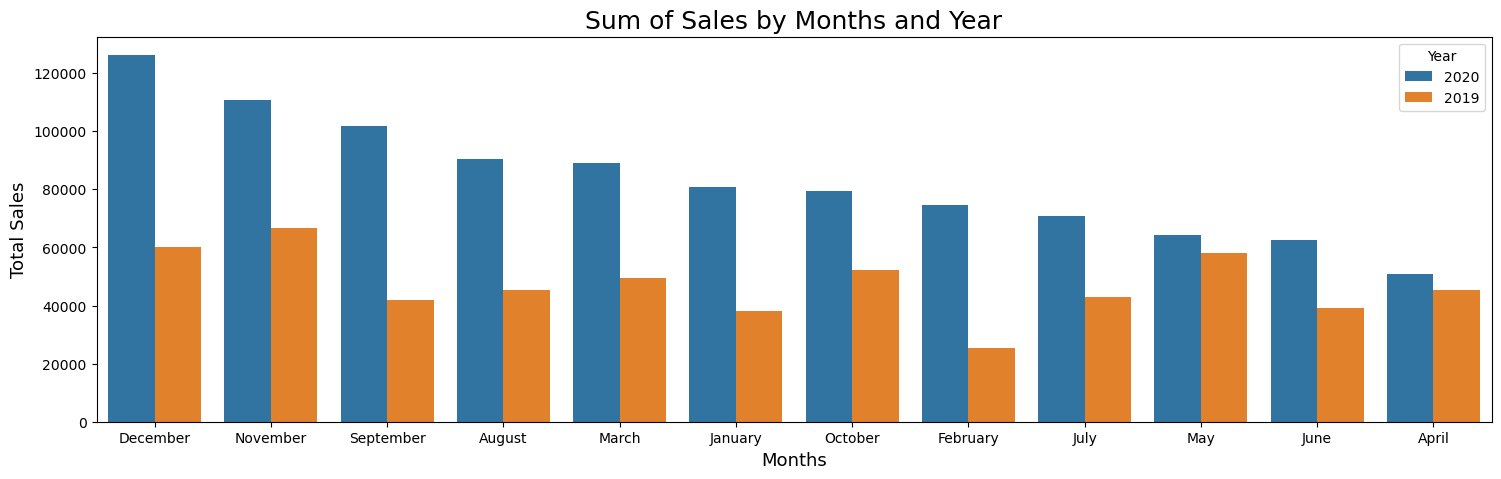

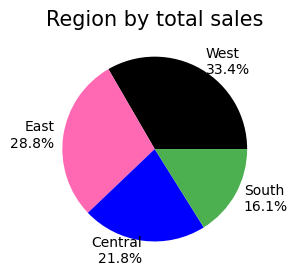

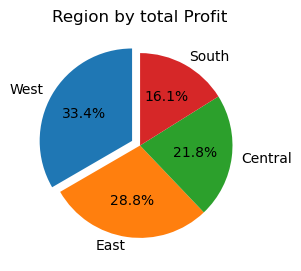

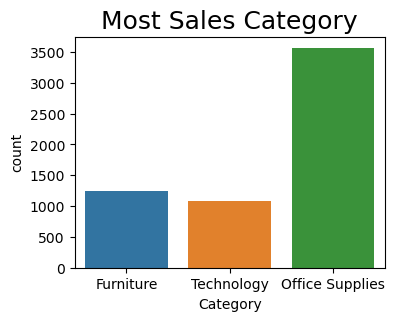

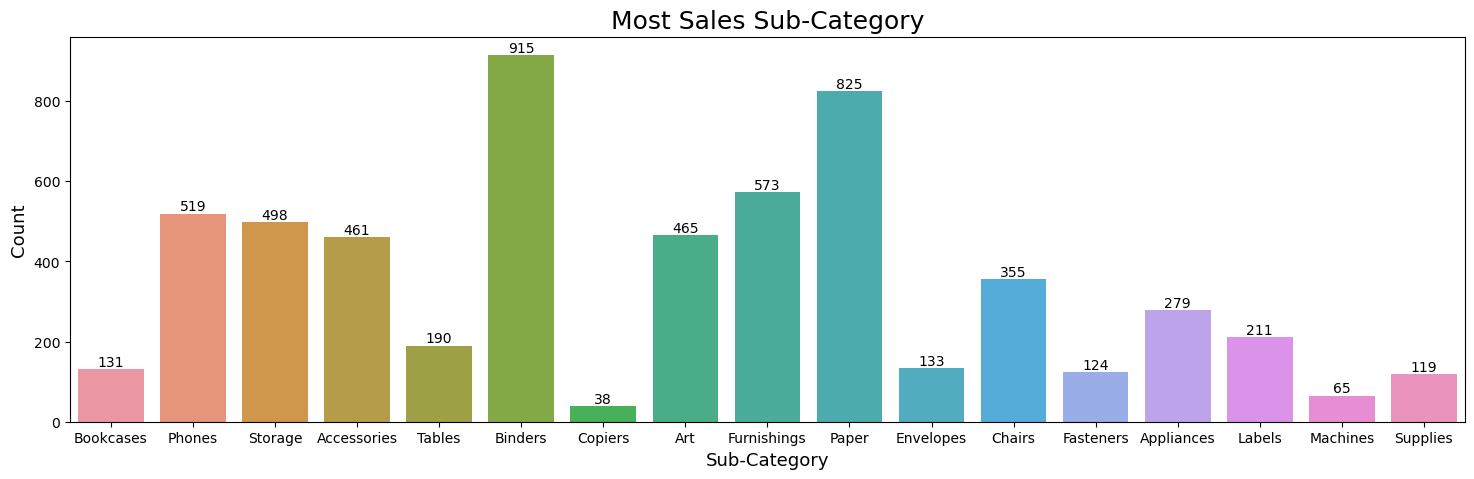

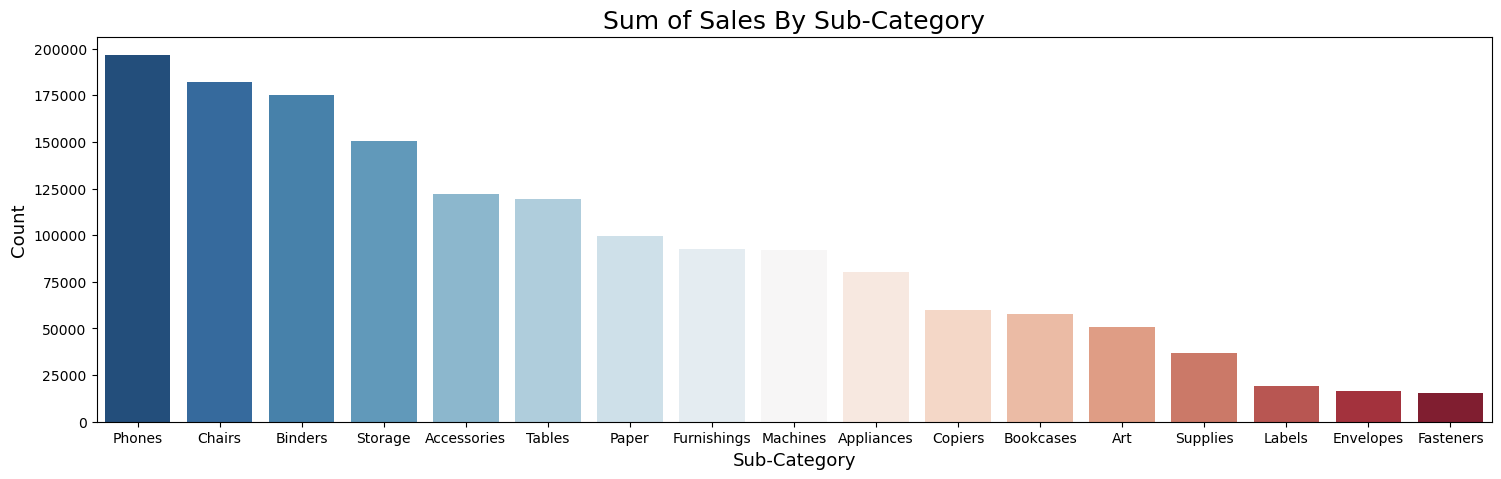

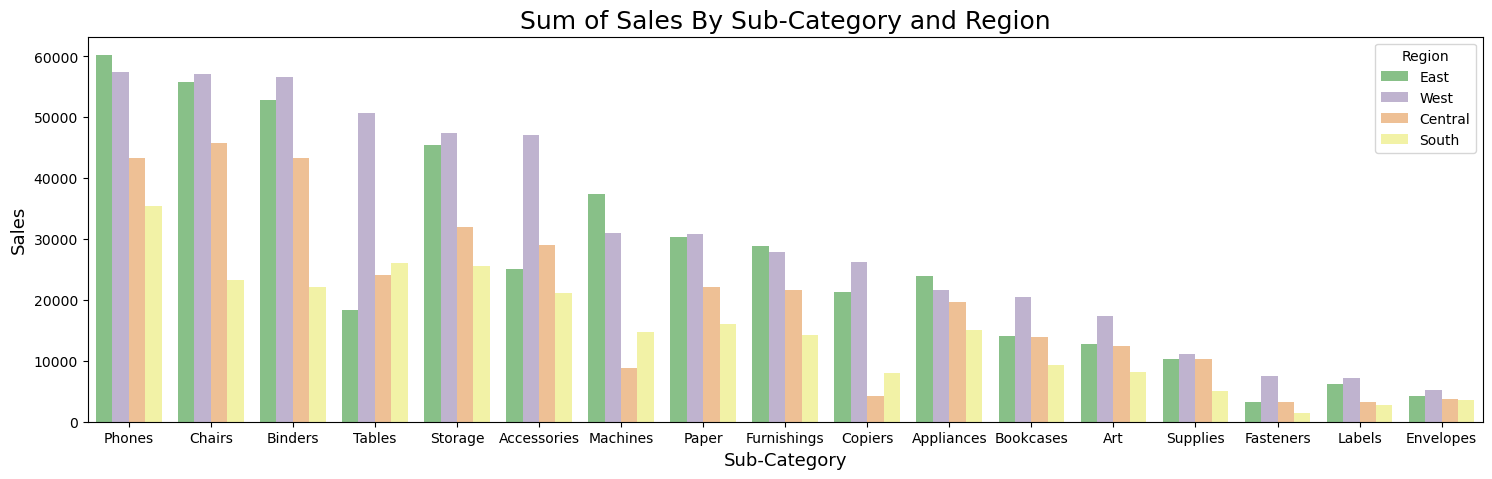

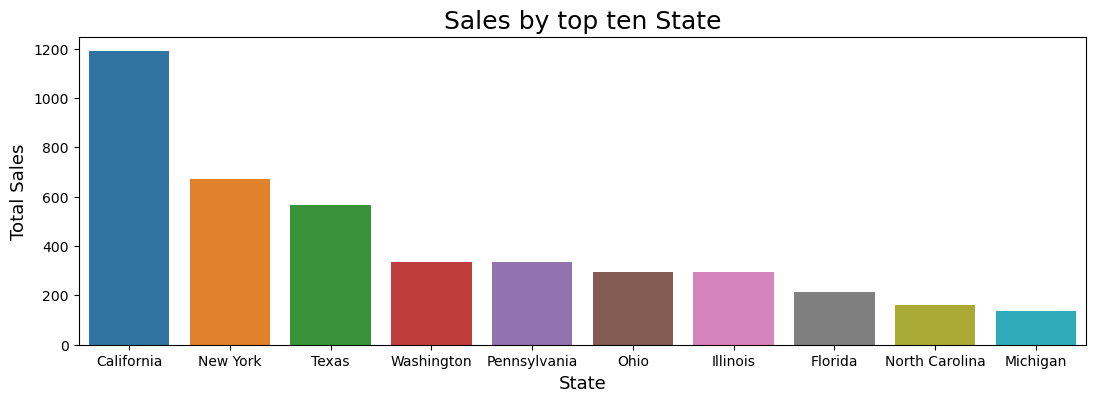

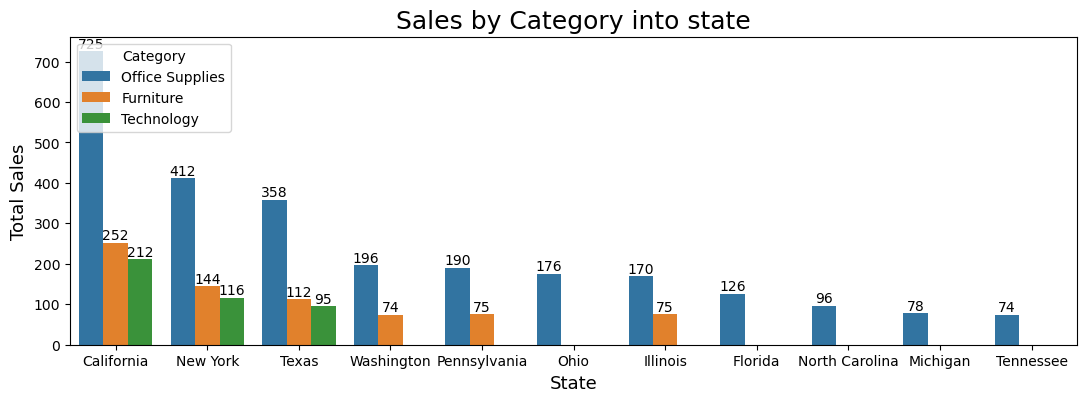

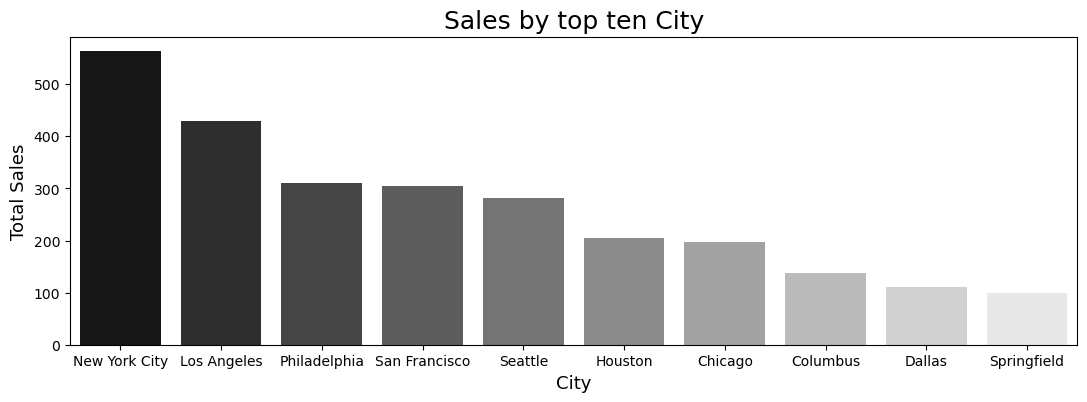

    Order Date  Sales       Days
107 2019-05-09     38   Thursday
352 2020-02-09     36     Sunday
246 2019-10-11     35     Friday
355 2020-02-12     34  Wednesday
329 2020-01-12     34     Sunday
    Customer ID    Customer Name      Sales
144    CJ-12010  Caroline Jumper  11596.974
416    KF-16285   Karen Ferguson  10941.274
701    SV-20365      Seth Vernon  10751.148
325    HW-14935  Helen Wasserman  10074.934
252    EH-13765     Edward Hooks   9542.988
103    BS-11365     Bill Shonely   9199.780
581    PK-19075        Pete Kriz   8812.054
376    JL-15835         John Lee   8765.332
5      AB-10060  Adam Bellavance   8167.080
399    JW-15220        Jane Waco   7933.554
                                           Product Name      Sales
18     3D Systems Cube Printer, 2nd Generation, Magenta  14334.890
388               Canon imageCLASS 2200 Advanced Copier  14076.824
766                Hewlett Packard LaserJet 3310 Copier  13837.732
650          GBC DocuBind TL300 Electric Binding S

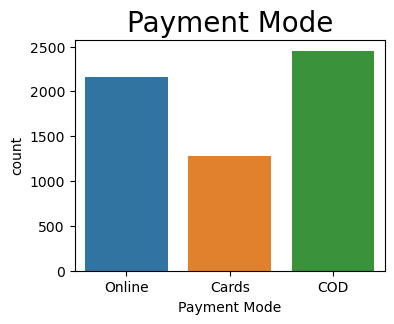

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
df = pd.read_json('super_store_data.json')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Year'] = df['Order Date'].dt.strftime('%Y')
df['Month'] = df['Order Date'].dt.strftime('%B')
def convert_to_millions(number):
    million_number = number / 1000000
    return f"{million_number:.2f}M"

float_number = np.sum(df['Sales'])
string_millions = convert_to_millions(float_number)
ss = f"| Total Sales: {string_millions} |"
for i in range(len(ss)):
    print("-",end='')
print(f"\n{ss}")
for i in range(len(ss)):
    print("-",end='')
print()
def convert_to_thousands(number):
    thousand_number = number / 1000
    return f"{thousand_number:.0f}K"

float_number = np.sum(df['Profit'])
string_thousands = convert_to_thousands(float_number)
ss=f"| Total Profit: {string_thousands} |" 
for i in range(len(ss)):
    print("-",end='')
print(f"\n{ss}")
for i in range(len(ss)):
    print("-",end='')
print()
plt.figure(figsize=(20,5))
sns.lineplot(x='Order Date', y='Sales', data=df[df['Year']=='2020'])
plt.title('Year of Data - 2020', fontsize=20, color='g')
plt.xlabel('Order Date', fontsize=15)
plt.ylabel('Total Sales', fontsize=15)
plt.show()
total_sales_month = df.groupby(['Year','Region'], as_index=False)['Sales'].sum().sort_values(by='Year', ascending=True)
plt.figure(figsize=(8,4))
sns.barplot(x='Year', y='Sales', data=total_sales_month, hue='Region')
plt.title('Sum of Sales by Year and Region', fontsize=18)
plt.show()
plt.figure(figsize=(18,5))
sns.lineplot(x='Month', y='Sales' ,data=df, hue='Year',style='Year', markers=["o","^"], dashes=False)
plt.title('Sales by Month and Year', fontsize=18)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Sales', fontsize=13)
plt.grid()
plt.show()
total_sales_month = df.groupby('Month', as_index=False)['Sales'].sum().sort_values(by='Month', ascending=True)
plt.figure(figsize=(18,5))
sns.barplot(x='Month', y='Sales', data=total_sales_month)
plt.title('Sum of Sales by Months', fontsize=18)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Total Sales', fontsize=13)
plt.show()
total_sales_month = df.groupby(['Year','Month'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(x='Month', y='Sales', data=total_sales_month, hue='Year')
plt.title('Sum of Sales by Months and Year', fontsize=18)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Total Sales', fontsize=13)
plt.show()
most_region = df.groupby('Region', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
x_sum = np.sum([i for i in most_region['Sales']])
find_per=[]
for i in range(most_region.shape[0]):
    m=most_region.iloc[i]
    a = (m['Sales']*100) / x_sum
    c = f"{m['Region']}\n{round(a, 1)}%"
    find_per.append(c)
mylabels = find_per
mycolors = ["black", "hotpink", "b", "#4CAF50"]
plt.figure(figsize = (4,3))
plt.pie(most_region['Sales'], labels=mylabels, colors=mycolors)
plt.title('Region by total sales', fontsize=15)
plt.show()
most_profit_region = df.groupby('Region', as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)
mylabels = [i for i in most_profit_region['Region']]
myexplode = [0.1,0,0,0]
plt.figure(figsize=(4,3))
plt.pie(most_region['Sales'], labels=mylabels, startangle=90, explode=myexplode, autopct='%1.1f%%')
plt.title('Region by total Profit')
plt.show()
plt.figure(figsize=(4,3))
sns.countplot(x='Category', data=df)
plt.title('Most Sales Category',fontsize=18)
plt.show()
plt.figure(figsize=(18,5))
ax = sns.countplot(x='Sub-Category', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Most Sales Sub-Category',fontsize=18)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Sub-Category', fontsize=13)
plt.show()
sum_sales = df.groupby('Sub-Category', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(x='Sub-Category', y='Sales', data=sum_sales, palette='RdBu_r')
plt.title('Sum of Sales By Sub-Category', fontsize=18)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Sub-Category', fontsize=13)
plt.show()
sum_sales = df.groupby(['Region','Sub-Category'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(x='Sub-Category', y='Sales', data=sum_sales, palette='Accent', hue='Region')
plt.title('Sum of Sales By Sub-Category and Region', fontsize=18)
plt.ylabel('Sales',fontsize=13)
plt.xlabel('Sub-Category', fontsize=13)
plt.show()
top_state = df.groupby('State', as_index=False)['Sales'].count().sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize = (13,4))
sns.barplot(x='State',y='Sales', data=top_state)
plt.title('Sales by top ten State', fontsize=18)
plt.ylabel('Total Sales', fontsize=13)
plt.xlabel('State', fontsize=13)
plt.show()
top_state = df.groupby(['State','Category'], as_index=False)['Sales'].count().sort_values(by='Sales', ascending=False).head(20)
plt.figure(figsize = (13,4))
ax = sns.barplot(x='State',y='Sales', data=top_state, hue='Category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Sales by Category into state', fontsize=18)
plt.ylabel('Total Sales', fontsize=13)
plt.xlabel('State', fontsize=13)
plt.show()
top_state = df.groupby('City', as_index=False)['Sales'].count().sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize = (13,4))
sns.barplot(x='City',y='Sales', data=top_state, palette='binary_r')
plt.title('Sales by top ten City', fontsize=18)
plt.ylabel('Total Sales', fontsize=13)
plt.xlabel('City', fontsize=13)
plt.show()
# Best selling Days
most_order_date = df.groupby('Order Date', as_index=False)['Sales'].count().sort_values(by='Sales', ascending=False).head()
most_order_date['Days'] = most_order_date['Order Date'].dt.strftime("%A")
print(most_order_date)
check_cus = df.groupby(['Customer ID', 'Customer Name'], as_index=False)['Sales'].sum().sort_values(by=['Sales'], ascending=False).head(10)
print(check_cus)
product_name = df.groupby('Product Name', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)
print(product_name)
plt.figure(figsize=(4,3))
sns.countplot(x='Payment Mode', data=df)
plt.title('Payment Mode', fontsize=20)
plt.show()